This is an example notebook for performing particle analysis using ParticleSpy.

This notebook takes a HAADF image of nanoparticles, allows the user to determine the best segmentation method and then performs analysis, producing a plot of particle areas.

Below, we load an image using Hyperspy.

In [1]:
import hyperspy.api as hs

filename = "Data/JEOL HAADF Image.dm4"
haadf = hs.load(filename)

C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Next, we can examine the image and determine the optimum segmentation procedure using the segmentation GUI. Experiment with changing the threshold algorithm and the application of watershedding to obtain the optimum labels. Once happy, click "Get Params" to print the current parameters.

In [4]:
import SegUI2 as sui
from PyQt5.QtWidgets import QApplication
import sys

app = QApplication(sys.argv)
app.aboutToQuit.connect(app.deleteLater)

ex = sui.main(haadf)

app.exec_()

{'threshold': 'otsu', 'watershed': None, 'min_size': None, 'store_im': None}


0

Next, we use the printed parameters to construct a parameter dictionary and use this to perform the segmentation.

In [6]:
import ParticleAnalysis

params = ParticleAnalysis.param_generator(threshold='otsu',watershed=None)
particles = ParticleAnalysis.ParticleAnalysis(haadf,params)

C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\filters\thresholding.py:348: RuntimeWarning: divide by zero encountered in reciprocal
  crit = np.log(((P1_sq[:-1] * P2_sq[1:]) ** -1) *
C:\Users\qzo13262\AppData\Local\Continuum\anaconda3\lib\site-packages\skimage\filters\thresholding.py:349: RuntimeWarning: invalid value encountered in multiply
  (P1[:-1] * (1.0 - P1[:-1])) ** 2)


It is then possible to plot a histogram of particle area.

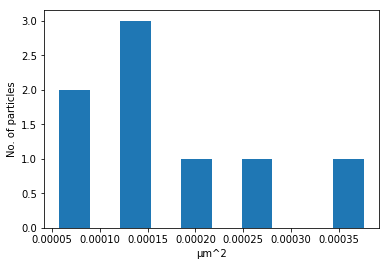

In [7]:
ParticleAnalysis.plot_area(particles)